In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
# 2. Load Dataset
df = pd.read_csv("dataset.csv", encoding="latin-1", header=None)

df = df[[0, 5]]
df.columns = ["label", "text"]

# Convert label: 0 -> Negative, 4 -> Positive
df["label"] = df["label"].map({0:0, 4:1})

print(df.head())

   label                                               text
0      0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1      0  is upset that he can't update his Facebook by ...
2      0  @Kenichan I dived many times for the ball. Man...
3      0    my whole body feels itchy and like its on fire 
4      0  @nationwideclass no, it's not behaving at all....


In [3]:
# 3. Text Cleaning Function
def clean_text(text):
    text = text.lower()                               # Lowercase
    text = re.sub(r"http\S+|www\S+", "", text)        # Remove URLs
    text = re.sub(r"@\w+", "", text)                  # Remove mentions
    text = re.sub(r"[^a-z\s]", "", text)              # Remove special chars/numbers
    return text

df["clean_text"] = df["text"].apply(clean_text)

print("\nSample Cleaned Tweets:\n", df["clean_text"].head())



Sample Cleaned Tweets:
 0       a thats a bummer  you shoulda got david car...
1    is upset that he cant update his facebook by t...
2     i dived many times for the ball managed to sa...
3      my whole body feels itchy and like its on fire 
4     no its not behaving at all im mad why am i he...
Name: clean_text, dtype: object


In [4]:
# 4. Train-Test Split
X = df["clean_text"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [5]:
# 5. Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [10]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Support Vector Machine": LinearSVC(),
}

In [11]:
# 7. Train and Evaluate Models
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=["Negative", "Positive"], output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    results[name] = {
        "Accuracy": acc,
        "Precision": report["macro avg"]["precision"],
        "Recall": report["macro avg"]["recall"],
        "F1-score": report["macro avg"]["f1-score"],
        "Confusion Matrix": conf_matrix
    }
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))
    print("Confusion Matrix:\n", conf_matrix)


Training Logistic Regression...

Classification Report:
              precision    recall  f1-score   support

    Negative       0.78      0.74      0.76    160000
    Positive       0.75      0.79      0.77    160000

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000

Confusion Matrix:
 [[118156  41844]
 [ 33163 126837]]

Training Naive Bayes...

Classification Report:
              precision    recall  f1-score   support

    Negative       0.75      0.76      0.75    160000
    Positive       0.75      0.75      0.75    160000

    accuracy                           0.75    320000
   macro avg       0.75      0.75      0.75    320000
weighted avg       0.75      0.75      0.75    320000

Confusion Matrix:
 [[121257  38743]
 [ 40625 119375]]

Training Support Vector Machine...


c:\Users\Naresh Damera\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(



Classification Report:
              precision    recall  f1-score   support

    Negative       0.78      0.73      0.76    160000
    Positive       0.75      0.80      0.77    160000

    accuracy                           0.76    320000
   macro avg       0.77      0.76      0.76    320000
weighted avg       0.77      0.76      0.76    320000

Confusion Matrix:
 [[117277  42723]
 [ 32510 127490]]


In [12]:
# 8. Compare Models
results_df = pd.DataFrame(results).T
print("\nModel Comparison:\n", results_df)


Model Comparison:
                         Accuracy Precision    Recall  F1-score  \
Logistic Regression     0.765603  0.766387  0.765603   0.76543   
Naive Bayes             0.751975   0.75201  0.751975  0.751966   
Support Vector Machine  0.764897  0.765981  0.764897  0.764657   

                                          Confusion Matrix  
Logistic Regression     [[118156, 41844], [33163, 126837]]  
Naive Bayes             [[121257, 38743], [40625, 119375]]  
Support Vector Machine  [[117277, 42723], [32510, 127490]]  


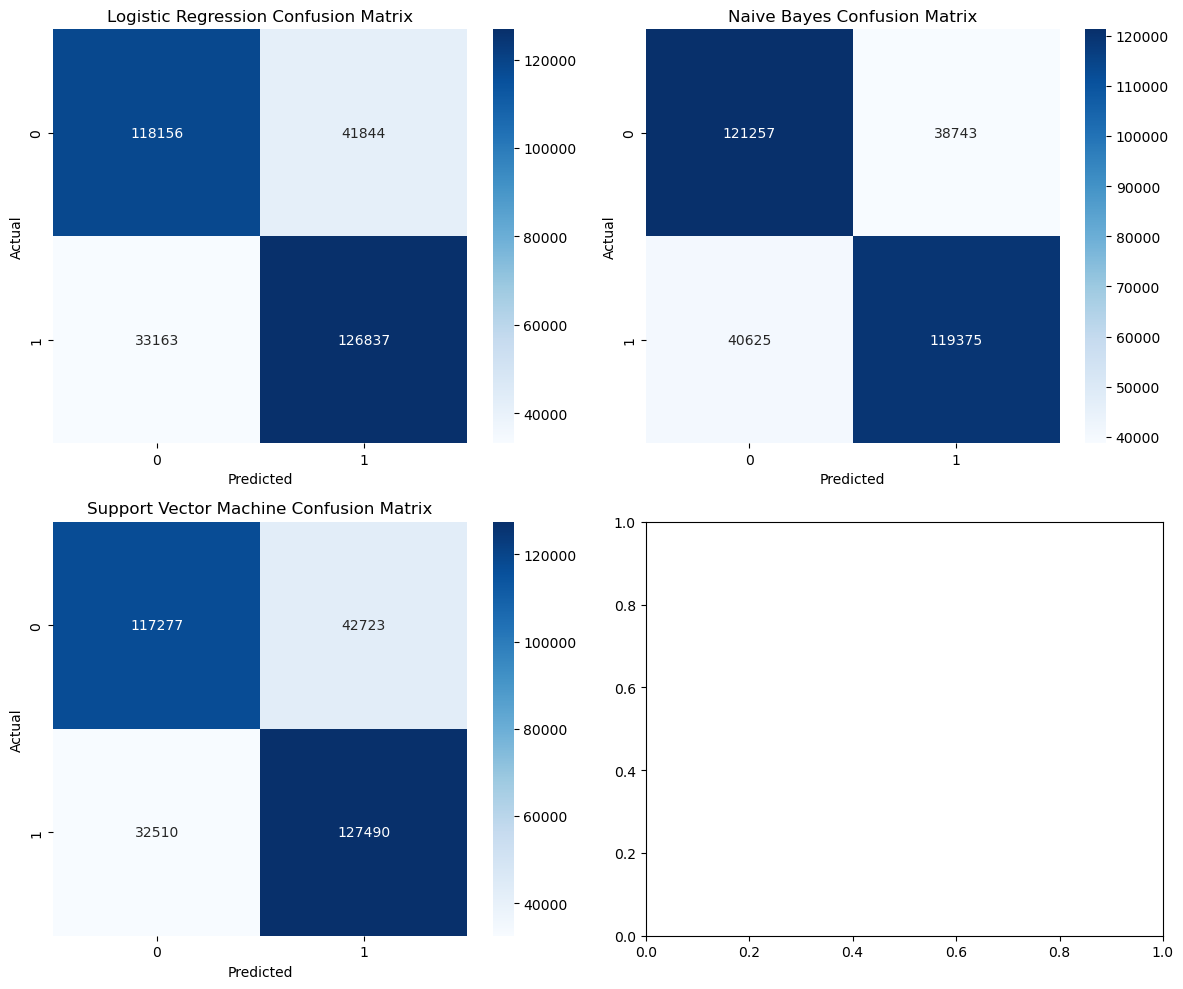

In [13]:
# 9. Plot Confusion Matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, (name, res) in zip(axes.flatten(), results.items()):
    sns.heatmap(res["Confusion Matrix"], annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f"{name} Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [ ]:
import joblib
joblib.dump(models["Logistic Regression"], "sentiment_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
